In [1]:
import pandas as pd
import seaborn as sns
from functools import reduce
import matplotlib.pyplot as plt


(array([0. , 0.5, 1. ]),
 [Text(0.0, 0, '0.0'), Text(0.5, 0, '0.5'), Text(1.0, 0, '1.0')])

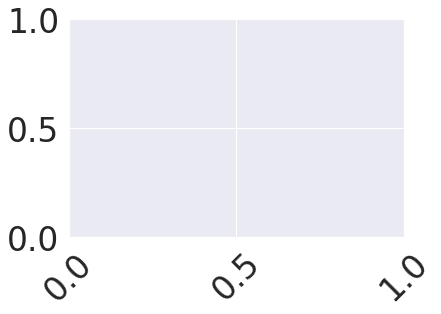

In [2]:
sns.set_context("poster")
sns.despine()
sns.set(font_scale = 3)
plt.rcParams['figure.figsize']=(15,15)
plt.xticks(rotation=45)

In [3]:
folders = ['json', 'gltf', 'gltf_on_demand', 'gltf_on_demand_multiple_files', 'gltf_on_demand_multiple_files_lod', 'gltf_on_demand_multiple_files_lod_active_scene']
iterations =['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

def readFilesIntoDataframes():
    dfs = {}
    

    for folder in folders:
        df_list = []

        for iteration in iterations:
            df = pd.read_json(f"results/{folder}/{iteration}/decode_stats.json")
            df_list.append(df)
        
        actual_df = pd.concat(df_list).groupby('checkpoint').agg(['min', 'max', 'mean'])
        dfs[folder] = actual_df
    
        
    return dfs

In [4]:
df_dict = readFilesIntoDataframes()

In [5]:
for folder in folders:
    name_replacement = {'timeToFull': folder}
    df_dict[folder] = df_dict[folder].rename(columns=name_replacement) 
    df_dict[folder] = df_dict[folder].T

In [12]:
new_df = pd.concat(df_dict.values())
column_replacement = {'json': 'JSON', 'gltf': 'glTF', 'gltf_on_demand': 'glTF OD', 'gltf_on_demand_multiple_files': 'glTF OD MF', 'gltf_on_demand_multiple_files_lod': 'glTF OD MF LOD', 'gltf_on_demand_multiple_files_lod_active_scene': 'glTF OD MF LOD AS'}
new_df

checkpoint                                                  1        2  \
json                                           min    86.3620  49.9140   
                                               max   106.1660  64.1060   
                                               mean   94.8402  57.3118   
gltf                                           min    22.8380   9.9310   
                                               max    40.2470  31.6090   
                                               mean   32.9313  15.6693   
gltf_on_demand                                 min     6.5200   3.8440   
                                               max     6.7540   4.0640   
                                               mean    6.6332   3.9349   
gltf_on_demand_multiple_files                  min     4.6850   3.2300   
                                               max     4.9680   3.5760   
                                               mean    4.7895   3.4042   
gltf_on_demand_multiple_files_lod              min     4.7070   3.3180   
                                               max     5.0770   4.7560   
                                               mean    4.8600   4.2135   
gltf_on_demand_multiple_files_lod_active_scene min     4.6290   3.4650   
                                               max     5.1310   4.8040   
                                               mean    4.8975   4.2083   

checkpoint                                                 3         4  \
json                                           min   46.3670  129.8970   
                                               max   74.1100  154.4590   
                                               mean  58.4182  136.7714   
gltf                                           min   20.8750   33.2490   
                                               max   39.2690   49.9930   
                                               mean  31.6376   41.6901   
gltf_on_demand                                 min    7.0940   12.5130   
                                               max    7.1930   13.5980   
                                               mean   7.1398   12.8975   
gltf_on_demand_multiple_files                  min    5.1640   11.5910   
                                               max    5.3800   11.8930   
                                               mean   5.2608   11.6780   
gltf_on_demand_multiple_files_lod              min    5.3500   12.4240   
                                               max    5.8020   12.6630   
                                               mean   5.5284   12.4936   
gltf_on_demand_multiple_files_lod_active_scene min    5.3660   12.4040   
                                               max    5.7420   12.6240   
                                               mean   5.5525   12.4863   

checkpoint                                                  5  
json                                           min   141.9460  
                                               max   159.9470  
                                               mean  148.9506  
gltf                                           min    49.6910  
                                               max    53.5290  
                                               mean   50.7985  
gltf_on_demand                                 min    26.5510  
                                               max    27.6540  
                                               mean   26.9937  
gltf_on_demand_multiple_files                  min    21.1420  
                                               max    21.4780  
                                               mean   21.2878  
gltf_on_demand_multiple_files_lod              min    21.3150  
                                               max    21.6420  
                                               mean   21.5186  
gltf_on_demand_multiple_files_lod_active_scene min    21.2980  
                                               max    21.7390  
                                  

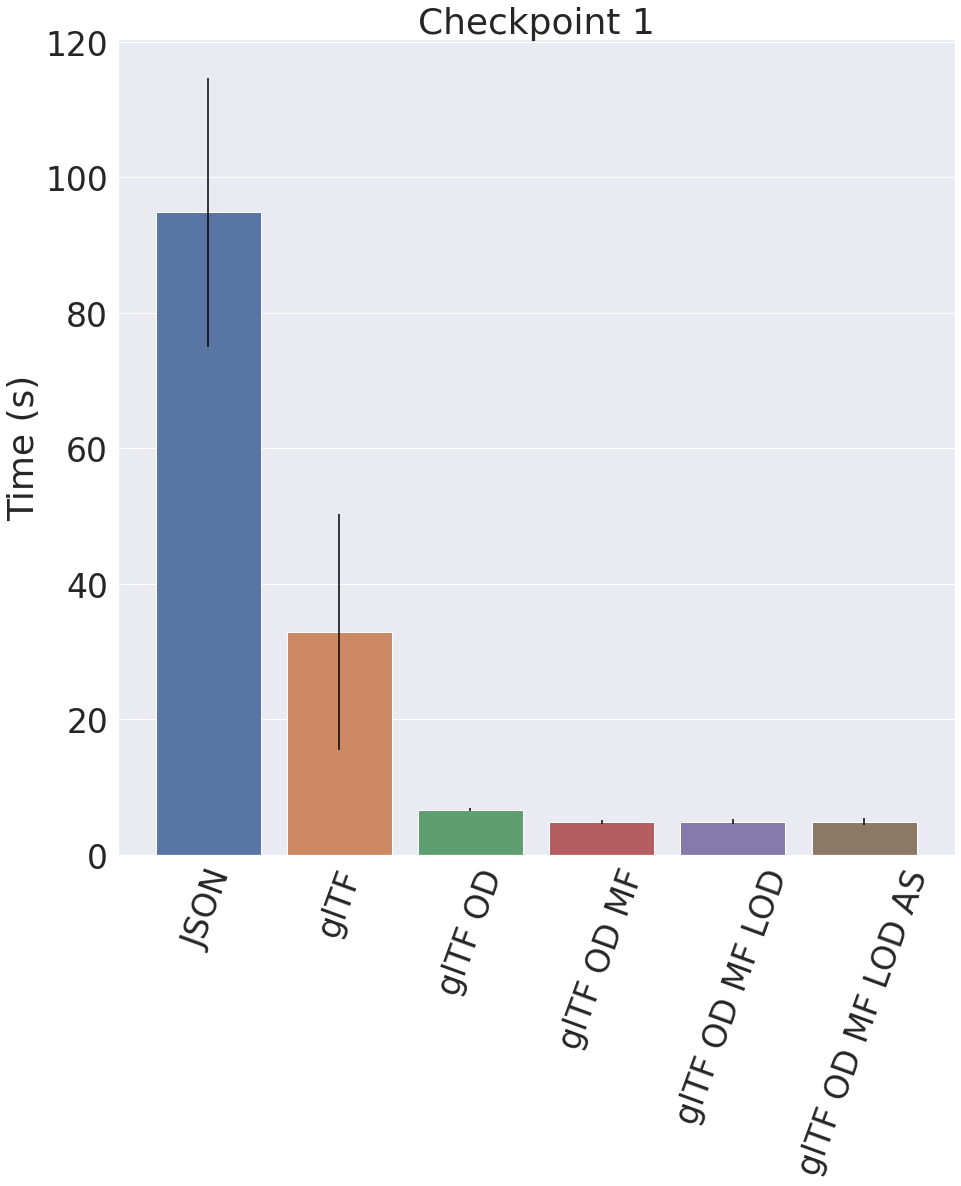

In [13]:
cp1_avg = new_df[1].to_frame().T
cp1_avg = cp1_avg.iloc[:, cp1_avg.columns.get_level_values(1)=='mean']
cp1_avg.columns = cp1_avg.columns.droplevel(1)
cp1_avg = cp1_avg.rename(columns=column_replacement)

cp1_err = new_df[1].to_frame().T
cp1_err_min = cp1_err.iloc[:, cp1_err.columns.get_level_values(1)=='min']
cp1_err_max = cp1_err.iloc[:, cp1_err.columns.get_level_values(1)=='max']
cp1_err_min.columns = cp1_err_min.columns.droplevel(1)
cp1_err_max.columns = cp1_err_max.columns.droplevel(1)

cp1_err_min = cp1_err_min.rename(columns=column_replacement)
cp1_err_max = cp1_err_max.rename(columns=column_replacement)

error = [cp1_err_max[column][1] - cp1_err_min[column][1] for column in cp1_avg.columns]

ax = sns.barplot(data=cp1_avg)
ax.errorbar(cp1_avg.columns, cp1_avg.iloc[0], yerr=error, xerr=None, ls='none', color="black")
ax.tick_params(axis='x', rotation=70)
ax.set(title='Checkpoint 1', ylabel='Time (s)')
plt.show()

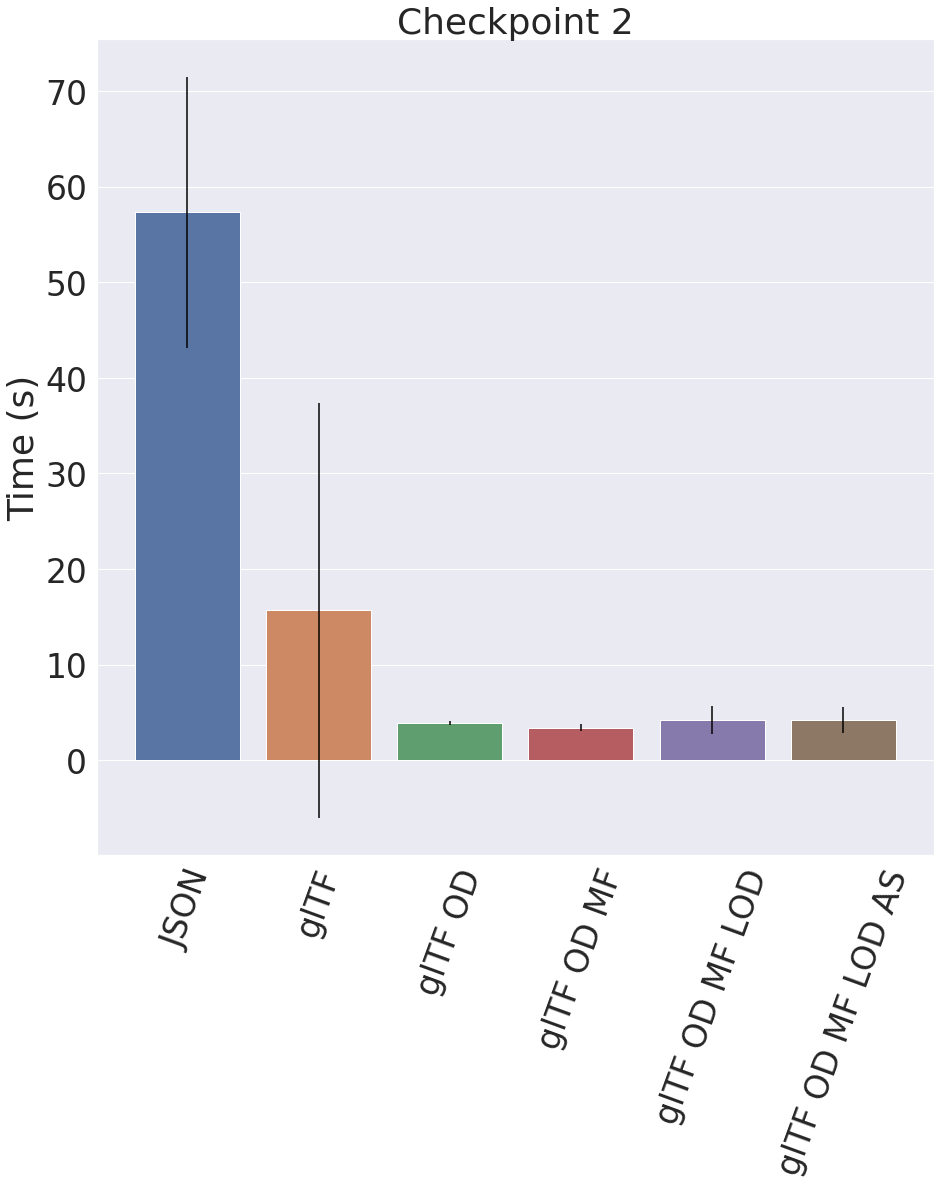

In [14]:
cp2_avg = new_df[2].to_frame().T
cp2_avg = cp2_avg.iloc[:, cp2_avg.columns.get_level_values(1)=='mean']
cp2_avg.columns = cp2_avg.columns.droplevel(1)
cp2_avg = cp2_avg.rename(columns=column_replacement)

cp2_err = new_df[2].to_frame().T
cp2_err_min = cp2_err.iloc[:, cp2_err.columns.get_level_values(1)=='min']
cp2_err_max = cp2_err.iloc[:, cp2_err.columns.get_level_values(1)=='max']
cp2_err_min.columns = cp2_err_min.columns.droplevel(1)
cp2_err_max.columns = cp2_err_max.columns.droplevel(1)

cp2_err_min = cp2_err_min.rename(columns=column_replacement)
cp2_err_max = cp2_err_max.rename(columns=column_replacement)

error = [cp2_err_max[column][2] - cp2_err_min[column][2] for column in cp2_avg.columns]

ax = sns.barplot(data=cp2_avg)
ax.errorbar(cp2_avg.columns, cp2_avg.iloc[0], yerr=error, xerr=None, ls='none', color="black")
ax.tick_params(axis='x', rotation=70)
ax.set(title='Checkpoint 2', ylabel='Time (s)')

plt.show()

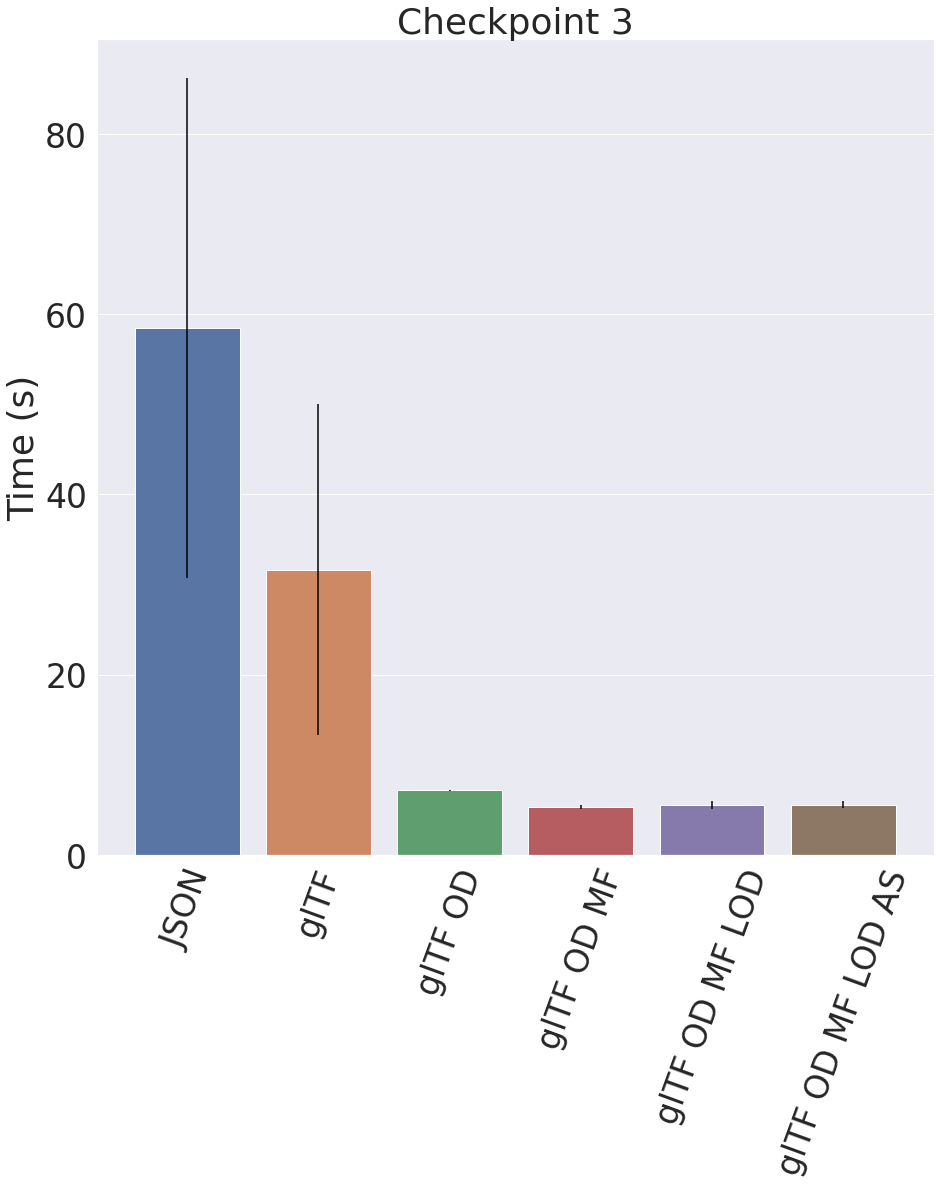

In [9]:
cp3_avg = new_df[3].to_frame().T
cp3_avg = cp3_avg.iloc[:, cp3_avg.columns.get_level_values(1)=='mean']
cp3_avg.columns = cp3_avg.columns.droplevel(1)
cp3_avg = cp3_avg.rename(columns=column_replacement)

cp3_err = new_df[3].to_frame().T
cp3_err_min = cp3_err.iloc[:, cp3_err.columns.get_level_values(1)=='min']
cp3_err_max = cp3_err.iloc[:, cp3_err.columns.get_level_values(1)=='max']
cp3_err_min.columns = cp3_err_min.columns.droplevel(1)
cp3_err_max.columns = cp3_err_max.columns.droplevel(1)

cp3_err_min = cp3_err_min.rename(columns=column_replacement)
cp3_err_max = cp3_err_max.rename(columns=column_replacement)

error = [cp3_err_max[column][3] - cp3_err_min[column][3] for column in cp3_avg.columns]

ax = sns.barplot(data=cp3_avg)
ax.errorbar(cp3_avg.columns, cp3_avg.iloc[0], yerr=error, xerr=None, ls='none', color="black")
ax.tick_params(axis='x', rotation=70)
ax.set(title='Checkpoint 3', ylabel='Time (s)')

plt.show()

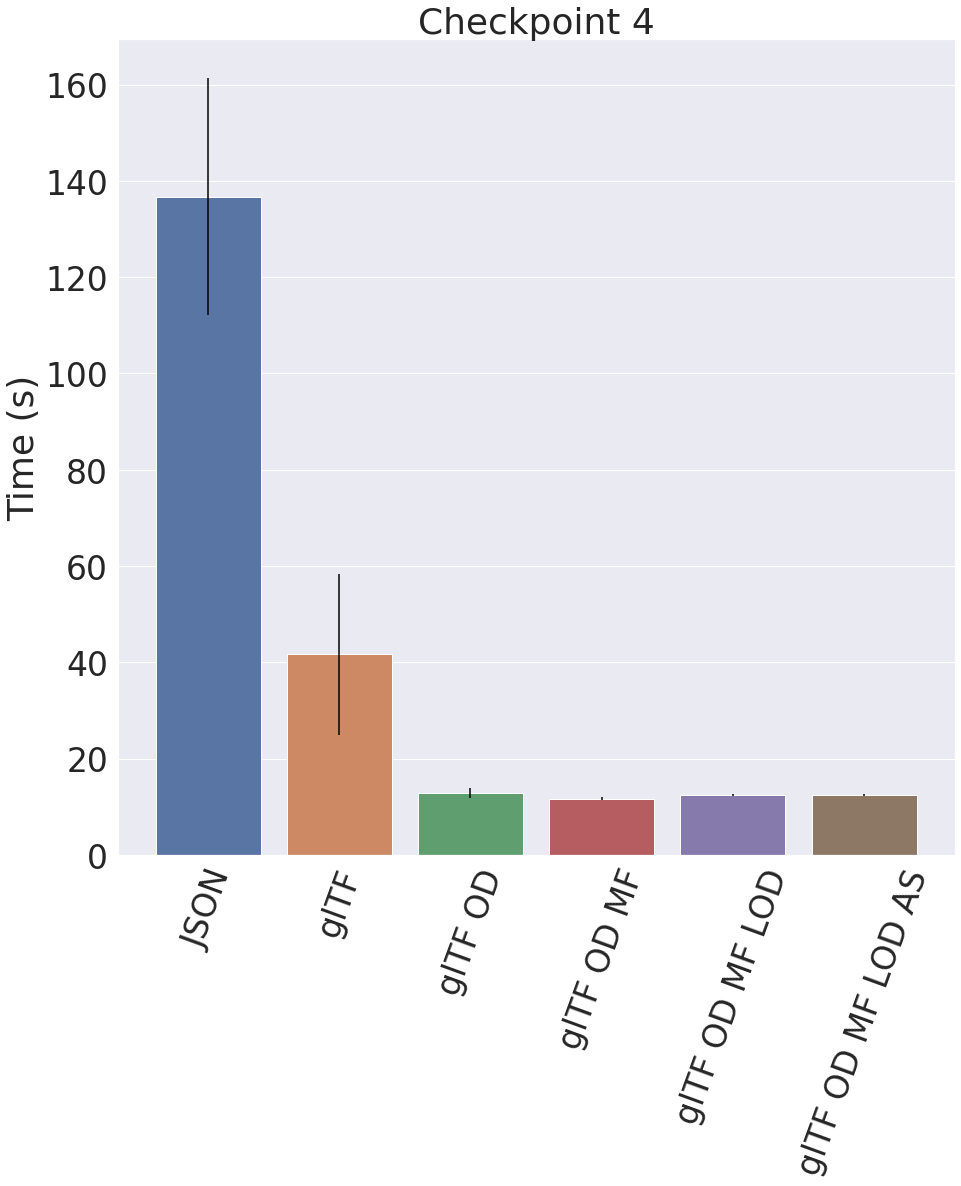

In [10]:
cp4_avg = new_df[4].to_frame().T
cp4_avg = cp4_avg.iloc[:, cp4_avg.columns.get_level_values(1)=='mean']
cp4_avg.columns = cp4_avg.columns.droplevel(1)
cp4_avg = cp4_avg.rename(columns=column_replacement)

cp4_err = new_df[4].to_frame().T
cp4_err_min = cp4_err.iloc[:, cp4_err.columns.get_level_values(1)=='min']
cp4_err_max = cp4_err.iloc[:, cp4_err.columns.get_level_values(1)=='max']
cp4_err_min.columns = cp4_err_min.columns.droplevel(1)
cp4_err_max.columns = cp4_err_max.columns.droplevel(1)

cp4_err_min = cp4_err_min.rename(columns=column_replacement)
cp4_err_max = cp4_err_max.rename(columns=column_replacement)

error = [cp4_err_max[column][4] - cp4_err_min[column][4] for column in cp4_avg.columns]

ax = sns.barplot(data=cp4_avg)
ax.errorbar(cp4_avg.columns, cp4_avg.iloc[0], yerr=error, xerr=None, ls='none', color="black")
ax.tick_params(axis='x', rotation=70)
ax.set(title='Checkpoint 4', ylabel='Time (s)')

plt.show()

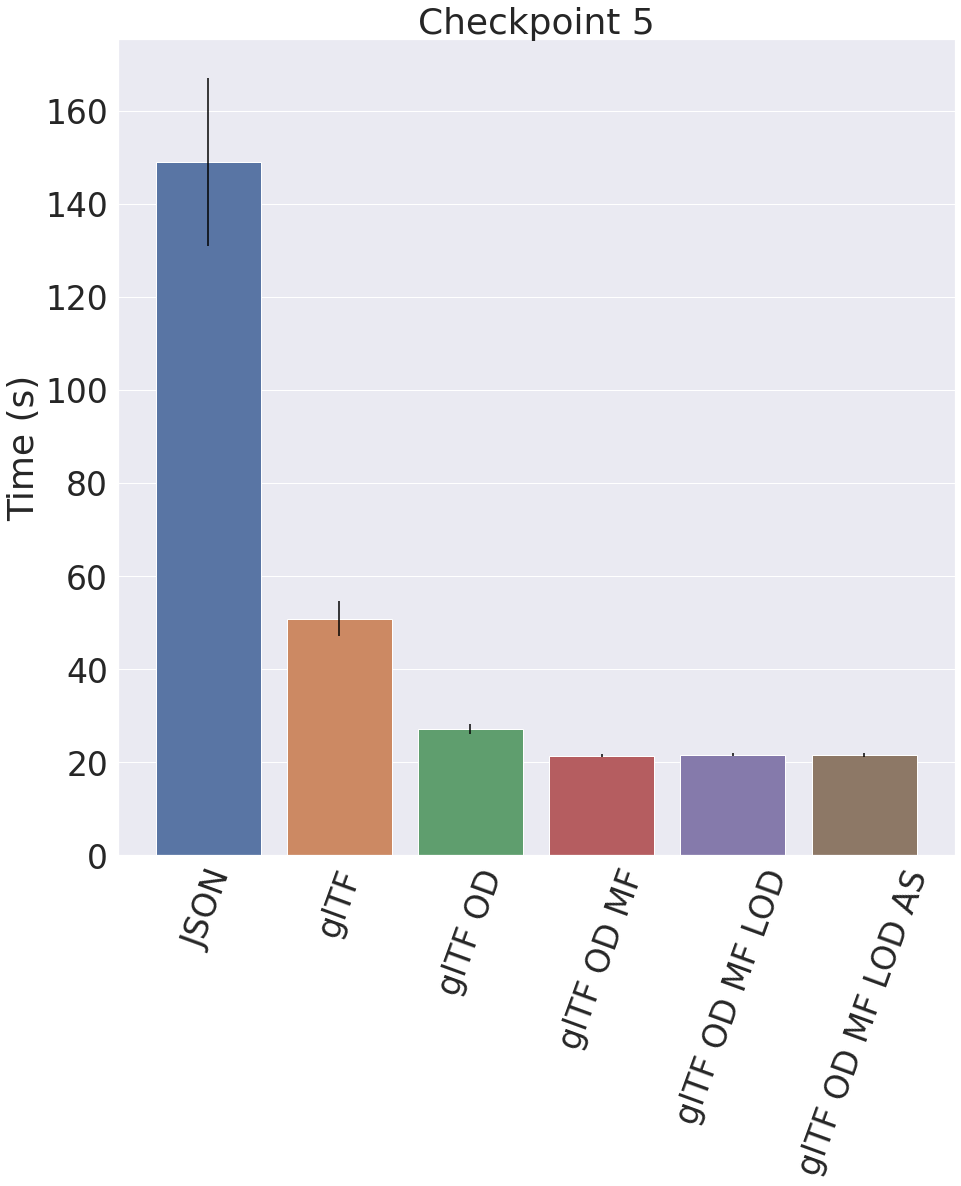

In [11]:
cp5_avg = new_df[5].to_frame().T
cp5_avg = cp5_avg.iloc[:, cp5_avg.columns.get_level_values(1)=='mean']
cp5_avg.columns = cp5_avg.columns.droplevel(1)
cp5_avg = cp5_avg.rename(columns=column_replacement)

cp5_err = new_df[5].to_frame().T
cp5_err_min = cp5_err.iloc[:, cp5_err.columns.get_level_values(1)=='min']
cp5_err_max = cp5_err.iloc[:, cp5_err.columns.get_level_values(1)=='max']
cp5_err_min.columns = cp5_err_min.columns.droplevel(1)
cp5_err_max.columns = cp5_err_max.columns.droplevel(1)

cp5_err_min = cp5_err_min.rename(columns=column_replacement)
cp5_err_max = cp5_err_max.rename(columns=column_replacement)

error = [cp5_err_max[column][5] - cp5_err_min[column][5] for column in cp5_avg.columns]

ax = sns.barplot(data=cp5_avg)
ax.errorbar(cp5_avg.columns, cp5_avg.iloc[0], yerr=error, xerr=None, ls='none', color="black")
ax.tick_params(axis='x', rotation=70)
ax.set(title='Checkpoint 5', ylabel='Time (s)')

plt.show()